<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Oct06-07/Oct06_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MCMC Metrópolis

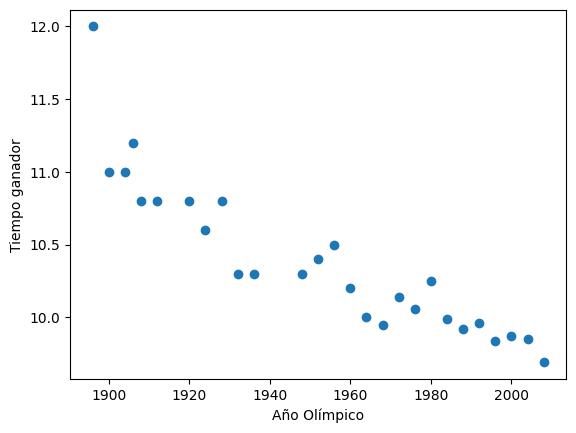

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])

plt.scatter(x, y)
plt.xlabel("Año Olímpico")
plt.ylabel("Tiempo ganador")
plt.show()

## Mi código:

### Sin normalizar datos:

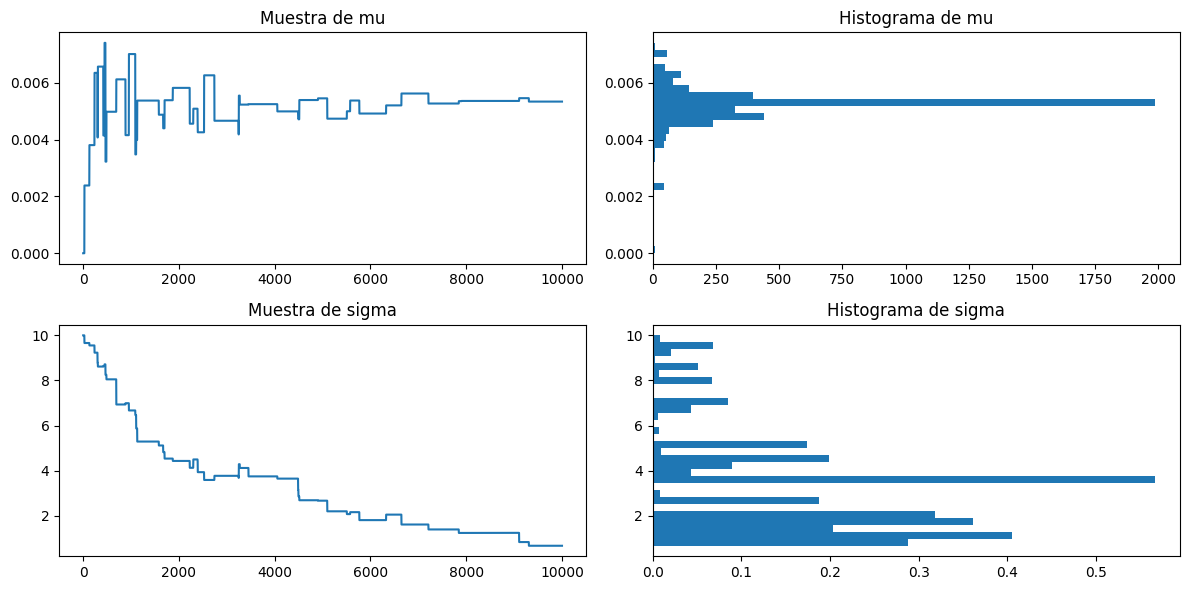

In [48]:
from scipy.stats import norm # Para sacar mu


# Función de log-likelihood (logaritmo del likelihood)
def log_likelihood(x, y, params):
  # Investigando, se le llama al primer parámetro mu y al segundo sigma.
    mu, sigma = params

    y_pred = mu * x # Calcula las predicciones del modelo

    # Cuando se pone norm.pdf(x, loc=0, scale=1)
    # Regresa: Densidad de probabilidad de (en este caso), y_pred y sigma con respecto a y
    log_likelihood_values = norm.logpdf(y, loc=y_pred, scale=sigma)
    return np.sum(log_likelihood_values)

# Función de log-prior (logaritmo del prior)
def log_prior(x, y, params):
    mu, sigma = params
    # Investigué y se pone por estandar 0 y 10:
    if 0 <= mu <= 10 and 0 <= sigma <= 10:
        return 0.0      # Priors uniformes
    else:
        return -np.inf  # Logaritmo de probabilidad 0

# Función para calcular el logaritmo del posterior
def log_posterior(x, y, params):
    if len(params) != 2:
        return -np.inf  # Retorna logaritmo de probabilidad 0 si params no tiene la forma correcta
    return log_likelihood(x, y, params) + log_prior(x, y, params)

# Algoritmo de Metrópolis MCMC visto en clase:
def metropolis_mcmc(initial_params, num_samples, proposal_std):
    # Hacemos el arreglo donde irá nuestra distribución:
    samples = [initial_params]
    # Variable donde se guardarán los aceptados.
    current_params = initial_params

    for _ in range(num_samples):
        # Propuesta de un nuevo conjunto de parámetros
        # random.normal returns: ndarray or scalar
        # Drawn samples from the parameterized normal distribution.
        proposal = np.random.normal(current_params, proposal_std)

        # Aceptación o rechazo de la propuesta
        log_acceptance_ratio = log_posterior(x, y, proposal) - log_posterior(x, y, current_params)
        if np.log(np.random.rand()) < log_acceptance_ratio:
            current_params = proposal

        # Si es aceptado se añade a "samples"
        samples.append(current_params)

    return np.array(samples)

# Parámetros iniciales y configuración MCMC

# Valores iniciales de mu y sigma
initial_params = [0.0, 10.0]
# Número de muestras a generar
num_samples = 10000
# W0 y W1 propuestos
proposal_std = [0.1, 0.3]

# Monte Carlo Metropolis
samples = metropolis_mcmc(initial_params, num_samples, proposal_std)

# Graficar resultados
# Vi en un video que graficaban los histogramas de manera perpendicular
# a la gráfica generada, entonce eso haré yo también:

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(samples[:, 0])
plt.title('Muestra de mu')
plt.subplot(2, 2, 2)
plt.hist(samples[:, 0], bins=30, orientation='horizontal', density=True)

plt.title('Histograma de mu')
plt.subplot(2, 2, 3)
plt.plot(samples[:, 1])
plt.title('Muestra de sigma')
plt.subplot(2, 2, 4)
plt.hist(samples[:, 1], bins=30, orientation='horizontal', density=True)
plt.title('Histograma de sigma')
plt.tight_layout()
plt.show()

In [51]:
# Obtener las muestras finales de w0 y w1 de las cadenas de MCMC
final_samples = samples[-1]  # Las últimas muestras suelen ser las más representativas

print("Parámetro estimado w0:", final_samples[0])
print("Parámetro estimado w1:", final_samples[1])

Parámetro estimado w0: 0.0367813814155353
Parámetro estimado w1: 0.9843390316039032


### Normalizando datos:

In [49]:
def normalize_data(x, y):
    x_mean, x_std = np.mean(x), np.std(x)
    y_mean, y_std = np.mean(y), np.std(y)

    x_normalized = (x - x_mean) / x_std
    y_normalized = (y - y_mean) / y_std

    return x_normalized, y_normalized

x, y = normalize_data(x, y)


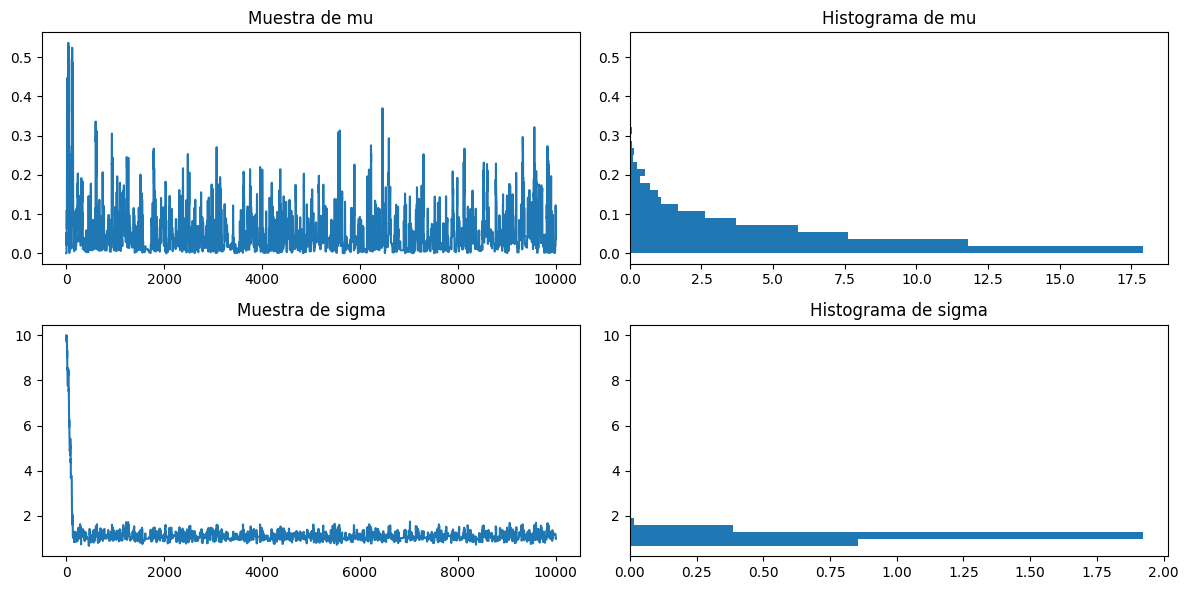

In [50]:
# Función de log-likelihood (logaritmo del likelihood)
def log_likelihood(x, y, params):
  # Investigando, se le llama al primer parámetro mu y al segundo sigma.
    mu, sigma = params

    y_pred = mu * x # Calcula las predicciones del modelo

    # Cuando se pone norm.pdf(x, loc=0, scale=1)
    # Regresa: Densidad de probabilidad de (en este caso), y_pred y sigma con respecto a y
    log_likelihood_values = norm.logpdf(y, loc=y_pred, scale=sigma)
    return np.sum(log_likelihood_values)

# Función de log-prior (logaritmo del prior)
def log_prior(x, y, params):
    mu, sigma = params
    # Investigué y se pone por estandar 0 y 10:
    if 0 <= mu <= 10 and 0 <= sigma <= 10:
        return 0.0      # Priors uniformes
    else:
        return -np.inf  # Logaritmo de probabilidad 0

# Función para calcular el logaritmo del posterior
def log_posterior(x, y, params):
    if len(params) != 2:
        return -np.inf  # Retorna logaritmo de probabilidad 0 si params no tiene la forma correcta
    return log_likelihood(x, y, params) + log_prior(x, y, params)

# Algoritmo de Metrópolis MCMC visto en clase:
def metropolis_mcmc(initial_params, num_samples, proposal_std):
    # Hacemos el arreglo donde irá nuestra distribución:
    samples = [initial_params]
    # Variable donde se guardarán los aceptados.
    current_params = initial_params

    for _ in range(num_samples):
        # Propuesta de un nuevo conjunto de parámetros
        # random.normal returns: ndarray or scalar
        # Drawn samples from the parameterized normal distribution.
        proposal = np.random.normal(current_params, proposal_std)

        # Aceptación o rechazo de la propuesta
        log_acceptance_ratio = log_posterior(x, y, proposal) - log_posterior(x, y, current_params)
        if np.log(np.random.rand()) < log_acceptance_ratio:
            current_params = proposal

        # Si es aceptado se añade a "samples"
        samples.append(current_params)

    return np.array(samples)

# Parámetros iniciales y configuración MCMC

# Valores iniciales de mu y sigma
initial_params = [0.0, 10.0]
# Número de muestras a generar
num_samples = 10000
# W0 y W1 propuestos
proposal_std = [0.1, 0.3]

# Monte Carlo Metropolis
samples = metropolis_mcmc(initial_params, num_samples, proposal_std)

# Graficar resultados
# Vi en un video que graficaban los histogramas de manera perpendicular
# a la gráfica generada, entonce eso haré yo también:

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(samples[:, 0])
plt.title('Muestra de mu')
plt.subplot(2, 2, 2)
plt.hist(samples[:, 0], bins=30, orientation='horizontal', density=True)

plt.title('Histograma de mu')
plt.subplot(2, 2, 3)
plt.plot(samples[:, 1])
plt.title('Muestra de sigma')
plt.subplot(2, 2, 4)
plt.hist(samples[:, 1], bins=30, orientation='horizontal', density=True)
plt.title('Histograma de sigma')
plt.tight_layout()
plt.show()

In [52]:
# Obtener las muestras finales de w0 y w1 de las cadenas de MCMC
final_samples = samples[-1]  # Las últimas muestras suelen ser las más representativas

print("Parámetro estimado w0:", final_samples[0])
print("Parámetro estimado w1:", final_samples[1])

Parámetro estimado w0: 0.0367813814155353
Parámetro estimado w1: 0.9843390316039032


### Mostrando evidencia de que las cadenas han convergido (triangle plots, secuencias de caminadores , criterio de Gelman-Rubin, etc.)

In [53]:
def gelman_rubin_diagnostic(chains):
    num_chains, num_samples = chains.shape

    # Calcular la varianza dentro de las cadenas (W)
    mean_within_chain = np.mean(chains, axis=1)
    var_within_chain = np.var(chains, axis=1, ddof=1)
    W = np.mean(var_within_chain)

    # Calcular la varianza entre las cadenas (B)
    mean_across_chains = np.mean(chains, axis=0)
    var_between_chains = num_samples * np.var(mean_across_chains, ddof=1)
    B = var_between_chains

    # Calcular el criterio de Gelman-Rubin
    R_hat = np.sqrt((W + (1 / num_chains) * B) / W)

    return R_hat

# Verificar la convergencia utilizando el criterio de Gelman-Rubin
gelman_rubin = gelman_rubin_diagnostic(samples)
print("Criterio de Gelman-Rubin:", gelman_rubin)

Criterio de Gelman-Rubin: 1.0000751497523963


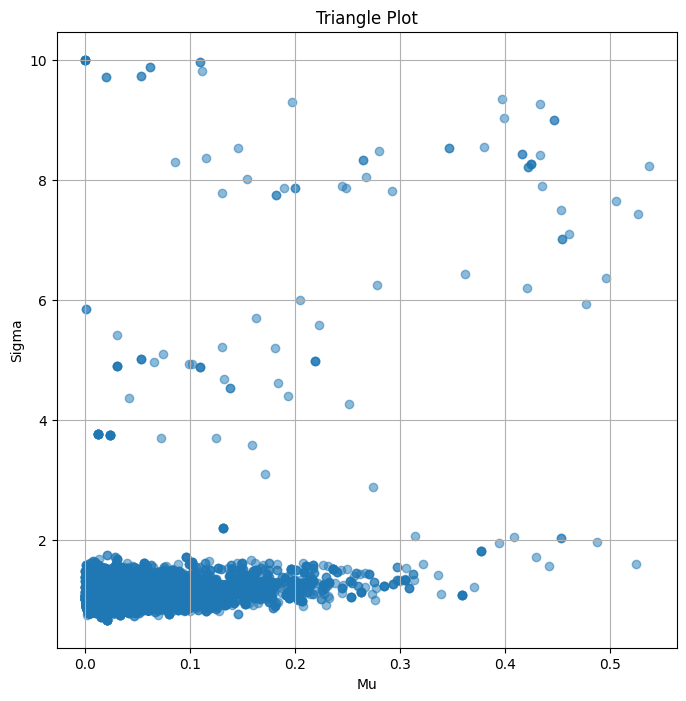

In [54]:
# Extraer las muestras de mu y sigma desde 'samples'
mu_samples = samples[:, 0]
sigma_samples = samples[:, 1]

# Crear un triangle plot usando matplotlib
plt.figure(figsize=(8, 8))
plt.scatter(mu_samples, sigma_samples, alpha=0.5)
plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.title('Triangle Plot')
plt.grid(True)
plt.show()

## Usando la librería emcee:

In [40]:
!pip install emcee

In [42]:
!pip install corner

Para la librería emcee modifiqué un poco mi código para las funciones del prior, usando solo params y utilicé mucha ayuda de internet para entender la librería, sobretodo el link de la maestra.

100%|██████████| 10000/10000 [00:23<00:00, 426.03it/s]


Valor estimado de mu (usando emcee): 0.047405363824697726
Valor estimado de sigma (usando emcee): 1.0966743338062457


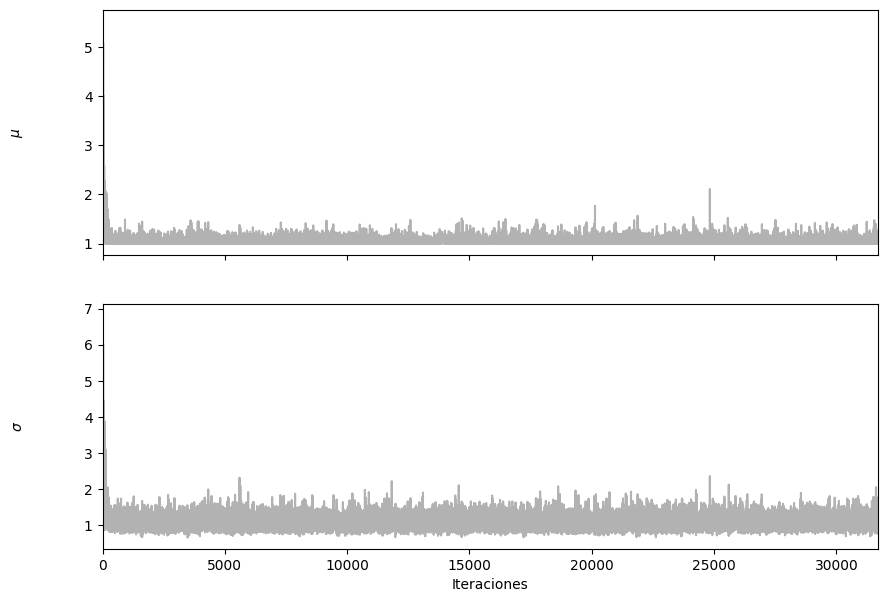

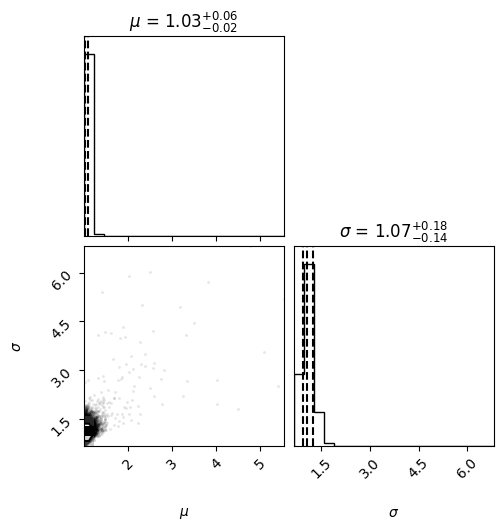

Criterio de Gelman-Rubin (R_hat): 255.44700944412267


In [56]:
import emcee
import corner

# Función de log-likelihood (logaritmo del likelihood)
def log_likelihood(params):
    mu, sigma = params
    y_pred = mu * x
    log_likelihood_values = -0.5 * np.sum((y - y_pred) ** 2 / sigma ** 2 + np.log(2 * np.pi * sigma ** 2))
    return log_likelihood_values

# Función de log-prior (logaritmo del prior)
def log_prior(params):
    mu, sigma = params
    if 0 <= mu <= 10 and 0 <= sigma <= 10:
        return 0.0
    else:
        return -np.inf

# Función para calcular el logaritmo del posterior
def log_posterior(params):
    return log_likelihood(params) + log_prior(params)

# Parámetros iniciales y configuración emcee
initial_params = [0.0, 10.0]
num_walkers = 32
num_samples = 10000
num_threads = 4

# Inicializa los caminadores en torno a los parámetros iniciales
initial_positions = initial_params + 1e-4 * np.random.randn(num_walkers, 2)

# Configura el sampler de emcee
sampler = emcee.EnsembleSampler(num_walkers, 2, lambda params: log_posterior(params), threads=num_threads)

# Ejecuta el MCMC
sampler.run_mcmc(initial_positions, num_samples, progress=True)

# Obtén las cadenas de muestra
samples = sampler.get_chain(discard=100, thin=10, flat=True)

# Calcula la media y la desviación estándar de las muestras
mu_emcee = np.mean(samples[:, 0])
sigma_emcee = np.mean(samples[:, 1])

# Imprime los valores estimados de mu y sigma
print("Valor estimado de mu (usando emcee):", mu_emcee)
print("Valor estimado de sigma (usando emcee):", sigma_emcee)

# Grafica los resultados
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples[:, 0] = np.exp(samples[:, 0])  # Exponencial para convertir sigma de log a lineal
labels = [r"$\mu$", r"$\sigma$"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("Iteraciones")

# Triangle plot
fig = corner.corner(samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

plt.show()

# Comprobación de convergencia con criterio de Gelman-Rubin
def gelman_rubin_diagnostic(samples):
    n, m = samples.shape
    B_over_n = np.sum((np.mean(samples, axis=1) - np.mean(samples))**2) / (m - 1)
    W = np.mean([np.var(samples[i]) for i in range(n)])
    var_theta = (m - 1) / m * W + B_over_n
    R_hat = np.sqrt(var_theta / W)
    return R_hat

R_hat = gelman_rubin_diagnostic(samples)
print("Criterio de Gelman-Rubin (R_hat):", R_hat)